## POČETNI PROGRAMSKI KOD

Sljedeći programski isječaj predstavlja glavnu klasu nad kojom čemo izvršavati operacije poput popunjavanja podatcima iz tablice, ispisivanje susjeda u obliku liste i matrice te iscrtavanje samog grafa

In [23]:
import pandas as pd
import networkx as nx

class Graphs:
    city_codes = {
        "ZAGREB": "ZG",
        "IVANIĆ GRAD": "IG",
        "KUTINA": "KT",
        "POŽEGA": "PŽ",
        "ĐAKOVO": "ĐK",
        "VIROVITICA": "VT",
        "BJELOVAR": "BJ",
        "GAREŠNICA": "GR",
        "PAKRAC": "PK",
        "SAMOBOR": "SB",
        "VARAŽDIN": "VŽ",
        "ŠIBENIK": "ŠI",
        "ČAZMA": "ČZ",
        "NAŠICE": "NA",
        "DARUVAR": "DA",
        "NOVSKA": "NS",
    }

    def __init__(self, excel_file: str):
        self.excel_file = excel_file
        self.table = None
        self.Graph_km = nx.Graph()
        self.Graph_min = nx.Graph()
        self.load_and_prepare()

    def load_and_prepare(self):
        # Učitavanje Excel tablice
        self.table = pd.read_excel(self.excel_file)

        # Preimenovanje stupaca radi jednostavnije upotrebe
        self.table.rename(columns={
            "POLAZIŠTE": "Polaziste",
            "ODREDIŠTE": "Odrediste",
            "UDALJENOST km": "Udaljenost_km",
            "PROSJEČNA BRZ km/h": "Brzina_kmh",
            "TRAJANJE [min]": "Trajanje_min"
        }, inplace=True)

        # Čišćenje naziva gradova i zamjena s kodovima
        self.table["Polaziste"] = self.table["Polaziste"].str.strip().str.upper()
        self.table["Odrediste"] = self.table["Odrediste"].str.strip().str.upper()

        self.table["Polaziste"] = self.table["Polaziste"].apply(lambda x: self.city_codes.get(x, x))
        self.table["Odrediste"] = self.table["Odrediste"].apply(lambda x: self.city_codes.get(x, x))

        # 1. Graf s udaljenošću (km)
        for _, row in self.table.iterrows():
            self.Graph_km.add_edge(row["Polaziste"], row["Odrediste"], weight=row["Udaljenost_km"])

        # 2. Graf s trajanjem (min)
        for _, row in self.table.iterrows():
            self.Graph_min.add_edge(row["Polaziste"], row["Odrediste"], weight=row["Trajanje_min"])


## 1. ZADATAK

Sljedeći programski kod ispisuje susjedne gradove u obliku liste i matrice.

In [24]:
import networkx as nx

if __name__ == "__main__":
    graphs = Graphs("MREZA_CESTOVNIH_PRAVACA.xlsx")

    # === LISTA SUSJEDSTVA ===

    print("Lista susjedstva (udaljenost u km):")
    for node in graphs.Graph_km.nodes:
        neighbors = ", ".join([f"{nbr} ({round(d['weight'], 1)} km)" for nbr, d in graphs.Graph_km[node].items()])
        print(f"{node}: {neighbors}")

    print("\nLista susjedstva (trajanje u min):")
    for node in graphs.Graph_min.nodes:
        neighbors = ", ".join([f"{nbr} ({round(d['weight'], 1)} min)" for nbr, d in graphs.Graph_min[node].items()])
        print(f"{node}: {neighbors}")

    # Matrica s udaljenostima
    matrix_km = nx.to_pandas_adjacency(graphs.Graph_km, weight='weight')
    print("\nMatrica susjedstva (udaljenosti u km):")
    print(matrix_km.round(1))

    # Matrica s trajanjem
    matrix_min = nx.to_pandas_adjacency(graphs.Graph_min, weight='weight')
    print("\nMatrica susjedstva (trajanje u minutama):")
    print(matrix_min.round(1))
    



Lista susjedstva (udaljenost u km):
ZG: IG (59.2 km), KT (82.5 km), PŽ (174.0 km), ĐK (242.0 km), VT (141.0 km), BJ (83.9 km), ŠI (336.0 km), SB (24.1 km), VŽ (86.7 km)
IG: ZG (59.2 km), ČZ (19.1 km), KT (44.6 km), BJ (50.5 km), NS (70.3 km), ĐK (206.0 km)
KT: ZG (82.5 km), GR (19.4 km), NS (25.6 km), VT (70.0 km), IG (44.6 km), PK (51.6 km), ČZ (52.8 km)
PŽ: ZG (174.0 km), NS (66.6 km), DA (68.0 km), PK (49.4 km), VT (90.7 km), ĐK (71.9 km), NA (47.2 km)
ĐK: ZG (242.0 km), VT (113.0 km), PŽ (71.9 km), NA (34.8 km), IG (206.0 km)
VT: ZG (141.0 km), KT (70.0 km), GR (50.7 km), DA (52.1 km), BJ (67.2 km), PŽ (90.7 km), ĐK (113.0 km), NA (77.2 km), NS (89.7 km)
BJ: ZG (83.9 km), GR (44.5 km), VT (67.2 km), ČZ (30.8 km), DA (53.5 km), IG (50.5 km)
GR: KT (19.4 km), DA (29.5 km), PK (33.9 km), VT (50.7 km), BJ (44.5 km)
NS: KT (25.6 km), PK (26.1 km), PŽ (66.6 km), IG (70.3 km), VT (89.7 km)
ČZ: IG (19.1 km), BJ (30.8 km), KT (52.8 km)
DA: GR (29.5 km), VT (52.1 km), PK (20.9 km), PŽ (68.0 

<pre> Lista susjedstva (udaljenost u km):
ZG: IG (59.2 km), KT (82.5 km), PŽ (174.0 km), ĐK (242.0 km), VT (141.0 km), BJ (83.9 km), ŠI (336.0 km), SB (24.1 km), VŽ (86.7 km)
IG: ZG (59.2 km), ČZ (19.1 km), KT (44.6 km), BJ (50.5 km), NS (70.3 km), ĐK (206.0 km)
KT: ZG (82.5 km), GR (19.4 km), NS (25.6 km), VT (70.0 km), IG (44.6 km), PK (51.6 km), ČZ (52.8 km)
PŽ: ZG (174.0 km), NS (66.6 km), DA (68.0 km), PK (49.4 km), VT (90.7 km), ĐK (71.9 km), NA (47.2 km)
ĐK: ZG (242.0 km), VT (113.0 km), PŽ (71.9 km), NA (34.8 km), IG (206.0 km)
VT: ZG (141.0 km), KT (70.0 km), GR (50.7 km), DA (52.1 km), BJ (67.2 km), PŽ (90.7 km), ĐK (113.0 km), NA (77.2 km), NS (89.7 km)
BJ: ZG (83.9 km), GR (44.5 km), VT (67.2 km), ČZ (30.8 km), DA (53.5 km), IG (50.5 km)
GR: KT (19.4 km), DA (29.5 km), PK (33.9 km), VT (50.7 km), BJ (44.5 km)
NS: KT (25.6 km), PK (26.1 km), PŽ (66.6 km), IG (70.3 km), VT (89.7 km)
ČZ: IG (19.1 km), BJ (30.8 km), KT (52.8 km)
DA: GR (29.5 km), VT (52.1 km), PK (20.9 km), PŽ (68.0 km), NA (86.1 km), BJ (53.5 km)
PK: GR (33.9 km), NS (26.1 km), DA (20.9 km), PŽ (49.4 km), NA (95.3 km), KT (51.6 km)
NA: DA (86.1 km), PK (95.3 km), VT (77.2 km), PŽ (47.2 km), ĐK (34.8 km)
ŠI: ZG (336.0 km)
SB: ZG (24.1 km)
VŽ: ZG (86.7 km)

Lista susjedstva (trajanje u min):
ZG: IG (48 min), KT (58 min), PŽ (115 min), ĐK (136 min), VT (148 min), BJ (79 min), ŠI (182 min), SB (20 min), VŽ (73 min)  
IG: ZG (48 min), ČZ (21 min), KT (51 min), BJ (58 min), NS (43 min), ĐK (108 min)
KT: ZG (58 min), GR (19 min), NS (27 min), VT (67 min), IG (51 min), PK (45 min), ČZ (42 min)
PŽ: ZG (115 min), NS (68 min), DA (66 min), PK (45 min), VT (95 min), ĐK (75 min), NA (51 min)
ĐK: ZG (136 min), VT (108 min), PŽ (75 min), NA (36 min), IG (108 min)
VT: ZG (148 min), KT (67 min), GR (49 min), DA (52 min), BJ (64 min), PŽ (95 min), ĐK (108 min), NA (73 min), NS (89 min)    
BJ: ZG (79 min), GR (44 min), VT (64 min), ČZ (32 min), DA (58 min), IG (58 min)
GR: KT (19 min), DA (28 min), PK (35 min), VT (49 min), BJ (44 min)
NS: KT (27 min), PK (28 min), PŽ (68 min), IG (43 min), VT (89 min)
ČZ: IG (21 min), BJ (32 min), KT (42 min)
DA: GR (28 min), VT (52 min), PK (23 min), PŽ (66 min), NA (109 min), BJ (58 min)
PK: GR (35 min), NS (28 min), DA (23 min), PŽ (45 min), NA (92 min), KT (45 min)
NA: DA (109 min), PK (92 min), VT (73 min), PŽ (51 min), ĐK (36 min)
ŠI: ZG (182 min)
SB: ZG (20 min)
VŽ: ZG (73 min)

Matrica susjedstva (udaljenosti u km):
       ZG     IG    KT     PŽ     ĐK     VT    BJ    GR    NS    ČZ    DA    PK    NA     ŠI    SB    VŽ
ZG    0.0   59.2  82.5  174.0  242.0  141.0  83.9   0.0   0.0   0.0   0.0   0.0   0.0  336.0  24.1  86.7
IG   59.2    0.0  44.6    0.0  206.0    0.0  50.5   0.0  70.3  19.1   0.0   0.0   0.0    0.0   0.0   0.0
KT   82.5   44.6   0.0    0.0    0.0   70.0   0.0  19.4  25.6  52.8   0.0  51.6   0.0    0.0   0.0   0.0
PŽ  174.0    0.0   0.0    0.0   71.9   90.7   0.0   0.0  66.6   0.0  68.0  49.4  47.2    0.0   0.0   0.0
ĐK  242.0  206.0   0.0   71.9    0.0  113.0   0.0   0.0   0.0   0.0   0.0   0.0  34.8    0.0   0.0   0.0
VT  141.0    0.0  70.0   90.7  113.0    0.0  67.2  50.7  89.7   0.0  52.1   0.0  77.2    0.0   0.0   0.0
BJ   83.9   50.5   0.0    0.0    0.0   67.2   0.0  44.5   0.0  30.8  53.5   0.0   0.0    0.0   0.0   0.0
GR    0.0    0.0  19.4    0.0    0.0   50.7  44.5   0.0   0.0   0.0  29.5  33.9   0.0    0.0   0.0   0.0
NS    0.0   70.3  25.6   66.6    0.0   89.7   0.0   0.0   0.0   0.0   0.0  26.1   0.0    0.0   0.0   0.0
ČZ    0.0   19.1  52.8    0.0    0.0    0.0  30.8   0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0
DA    0.0    0.0   0.0   68.0    0.0   52.1  53.5  29.5   0.0   0.0   0.0  20.9  86.1    0.0   0.0   0.0
PK    0.0    0.0  51.6   49.4    0.0    0.0   0.0  33.9  26.1   0.0  20.9   0.0  95.3    0.0   0.0   0.0
NA    0.0    0.0   0.0   47.2   34.8   77.2   0.0   0.0   0.0   0.0  86.1  95.3   0.0    0.0   0.0   0.0
ŠI  336.0    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0
SB   24.1    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0
VŽ   86.7    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0   0.0   0.0

Matrica susjedstva (trajanje u minutama):
       ZG     IG    KT     PŽ     ĐK     VT    BJ    GR    NS    ČZ     DA    PK     NA     ŠI    SB    VŽ
ZG    0.0   48.0  58.0  115.0  136.0  148.0  79.0   0.0   0.0   0.0    0.0   0.0    0.0  182.4  20.4  73.2
IG   48.0    0.0  51.0    0.0  108.0    0.0  57.9   0.0  43.0  21.0    0.0   0.0    0.0    0.0   0.0   0.0
KT   58.0   51.0   0.0    0.0    0.0   67.0   0.0  19.0  27.0  42.1    0.0  45.4    0.0    0.0   0.0   0.0
PŽ  115.0    0.0   0.0    0.0   75.0   95.0   0.0   0.0  68.0   0.0   66.0  45.0   51.0    0.0   0.0   0.0
ĐK  136.0  108.0   0.0   75.0    0.0  108.0   0.0   0.0   0.0   0.0    0.0   0.0   36.0    0.0   0.0   0.0
VT  148.0    0.0  67.0   95.0  108.0    0.0  64.0  49.0  89.3   0.0   52.0   0.0   73.0    0.0   0.0   0.0
BJ   79.0   57.9   0.0    0.0    0.0   64.0   0.0  44.0   0.0  32.0   58.3   0.0    0.0    0.0   0.0   0.0
GR    0.0    0.0  19.0    0.0    0.0   49.0  44.0   0.0   0.0   0.0   28.0  35.0    0.0    0.0   0.0   0.0
NS    0.0   43.0  27.0   68.0    0.0   89.3   0.0   0.0   0.0   0.0    0.0  28.0    0.0    0.0   0.0   0.0
ČZ    0.0   21.0  42.1    0.0    0.0    0.0  32.0   0.0   0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0
DA    0.0    0.0   0.0   66.0    0.0   52.0  58.3  28.0   0.0   0.0    0.0  23.0  109.0    0.0   0.0   0.0
PK    0.0    0.0  45.4   45.0    0.0    0.0   0.0  35.0  28.0   0.0   23.0   0.0   92.0    0.0   0.0   0.0
NA    0.0    0.0   0.0   51.0   36.0   73.0   0.0   0.0   0.0   0.0  109.0  92.0    0.0    0.0   0.0   0.0
ŠI  182.4    0.0   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0    0.0    0.0   0.0   0.0 </pre>

## 2. ZADATAK

Sljedeći programski kod prikazuje slike grafova za obje vrste - graf s udaljenostima i graf s trajanjem

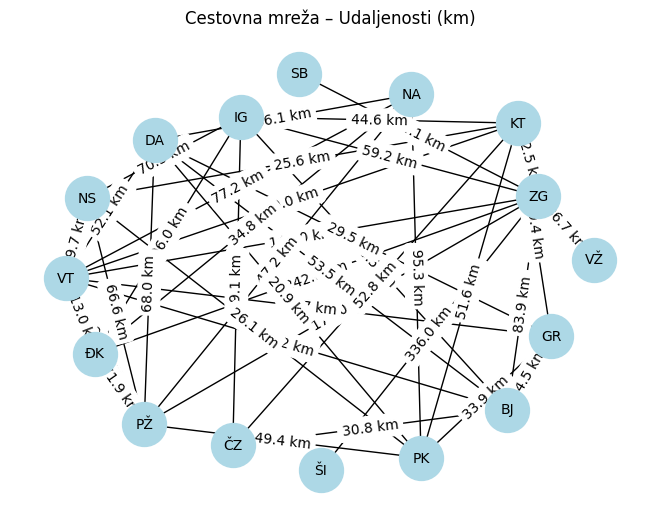

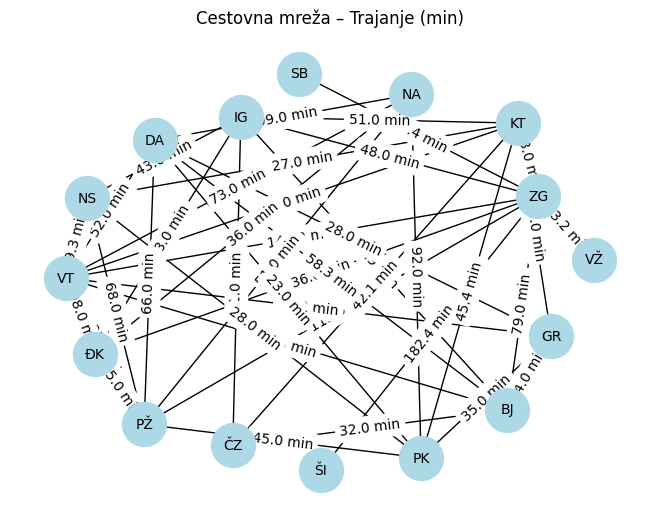

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

if __name__ == "__main__":
    graphs = Graphs("MREZA_CESTOVNIH_PRAVACA.xlsx")

    # Prikaz grafa s udaljenostima
    positions = nx.spring_layout(graphs.Graph_km, seed=3, k=100)
    nx.draw(graphs.Graph_km, positions, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
    edge_labels = nx.get_edge_attributes(graphs.Graph_km, 'weight')
    nx.draw_networkx_edge_labels(graphs.Graph_km, positions, edge_labels={k: f"{v:.1f} km" for k, v in edge_labels.items()})
    plt.title("Cestovna mreža – Udaljenosti (km)")
    plt.show()

    # Prikaz grafa s trajanjem
    positions = nx.spring_layout(graphs.Graph_min, seed=3, k=100)
    nx.draw(graphs.Graph_min, positions, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
    edge_labels = nx.get_edge_attributes(graphs.Graph_min, 'weight')
    nx.draw_networkx_edge_labels(graphs.Graph_min, positions, edge_labels={k: f"{v:.1f} min" for k, v in edge_labels.items()})
    plt.title("Cestovna mreža – Trajanje (min)")
    plt.show()

    



![Graf_Km_1](Graf_Km_1.png "Prikaz grafa s udaljenostima (km)")
![Graf_Min_2](Graf_Min_2.png "Prikaz grafa s trajanjem (min)")

## 3. ZADATAK

In [32]:
import networkx as nx

def print_shortest_path(graph, source, target, kriterij_naziv):
    try:
        path = nx.shortest_path(graph, source=source, target=target, weight='weight')
        length = nx.shortest_path_length(graph, source=source, target=target, weight='weight')
        path_str = " -> ".join(path)
        print(f"Najkraći put od {source} do {target} ({kriterij_naziv}):", flush=True)
        print(f"  put: {path_str}", flush=True)
        print(f"  ukupno: {round(length, 1)} {kriterij_naziv}", flush=True)
        print(flush=True)
    except nx.NetworkXNoPath:
        print(f"Nema puta od {source} do {target} ({kriterij_naziv}).\n", flush=True)

parovi = [
    ("ZG", "KT"),
    ("NA", "VT"),
    ("IG", "PŽ"),
    ("DA", "SB"),
]

for polaziste, odrediste in parovi:
    print_shortest_path(graphs.Graph_km, polaziste, odrediste, "km")
    print_shortest_path(graphs.Graph_min, polaziste, odrediste, "min")

Najkraći put od ZG do KT (km):
  put: ZG -> KT
  ukupno: 82.5 km

Najkraći put od ZG do KT (min):
  put: ZG -> KT
  ukupno: 58.0 min

Najkraći put od NA do VT (km):
  put: NA -> VT


  ukupno: 77.2 km

Najkraći put od NA do VT (min):
  put: NA -> VT
  ukupno: 73.0 min

Najkraći put od IG do PŽ (km):
  put: IG -> KT -> NS -> PŽ
  ukupno: 136.8 km

Najkraći put od IG do PŽ (min):
  put: IG -> NS -> PŽ
  ukupno: 111.0 min

Najkraći put od DA do SB (km):
  put: DA -> GR -> KT -> ZG -> SB
  ukupno: 155.5 km

Najkraći put od DA do SB (min):
  put: DA -> GR -> KT -> ZG -> SB
  ukupno: 125.4 min



Najkraći put od ZG do KT (km):
  put: ZG -> KT
  ukupno: 82.5 km

Najkraći put od ZG do KT (min):
  put: ZG -> KT
  ukupno: 58.0 min

Najkraći put od NA do VT (km):
  put: NA -> VT
  ukupno: 77.2 km

Najkraći put od NA do VT (min):
  put: NA -> VT
  ukupno: 73.0 min

Najkraći put od IG do PŽ (km):
  put: IG -> KT -> NS -> PŽ
  ukupno: 136.8 km

Najkraći put od IG do PŽ (min):
  put: IG -> NS -> PŽ
  ukupno: 111.0 min

Najkraći put od DA do SB (km):
  put: DA -> GR -> KT -> ZG -> SB
  ukupno: 155.5 km

Najkraći put od DA do SB (min):
  put: DA -> GR -> KT -> ZG -> SB
  ukupno: 125.4 min